Exercise 3

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Lambda = [[0,3/4,3/8,0,0],
         [0,0,1/4,1/4,2/4],
         [0,0,0,1,0],
         [0,0,0,0,1],
         [0,0,0,0,0]]

In [3]:
w = np.sum(Lambda, axis=1)
w[-1]=2
w_star = np.max(w)
# compute the off-diagonal part of Q
Q = Lambda/w_star 
# add the diagonal part
Q = Q + np.diag(np.ones(len(w))-np.sum(Q,axis=1))

# compute dominant eigenvector
values,vectors = np.linalg.eig(Q.T)
index = np.argmax(values.real)
pi_bar = vectors[:,index].real
pi_bar = pi_bar/np.sum(pi_bar)
print("pi_bar=", pi_bar)

n_states = len(pi_bar)

pi_bar= [0. 0. 0. 0. 1.]


In [4]:
n_nodes = 5

In [7]:
n_simul = 1
n_part = np.array([0,0,0,0,0])
n_net=0

for k in range (0,n_simul):
    n_part = np.array([0,0,0,0,0])
    n_part_time= np.array([0,0,0,0,0])
    sum_tnext = 0
    n_net = 0
    print("simul",k)
    while (sum_tnext <= 60):
        if(n_part[0]==0):
            n_part[0] += 1
            n_net +=1
            sum_tnext += -np.log(np.random.rand())/(w_star*n_net)
            n_part_time = np.row_stack((n_part_time,n_part))
            
        else:
            prob_nodes = [n_part[0]/n_net, n_part[1]/n_net, n_part[2]/n_net,n_part[3]/n_net,n_part[4]/n_net]
            chosen_node = np.random.choice (n_nodes, p=prob_nodes)
            pos = np.random.choice(n_states, p = Q[chosen_node,:])
            print(chosen_node)
            n_part[chosen_node] -=1
            if (chosen_node==4):
                n_net -=1
            else:
                n_part[pos] +=1
            
            sum_tnext += -np.log(np.random.rand())/(w_star*n_net)
            n_part_time = np.row_stack((n_part_time,n_part))
        
            if (sum_tnext.is_integer()):
                n_part[0]+=1
                n_net +=1
            
       
    

simul 0
0
0
0
0
0
0
1
1
2
0
2
2
0
2
3
3
3
1
2
3
0
3
3
3
4
4
2
2
2
0
3
3
3
3
4
3
3
4
4
0
4
0
0
2
0
0
0
0
0
1
1
1
1
0
4
3
3
0
4
1
0
4
0
0
0
2
2
0
2
3
4
2
3
2
0
0
2
0
0
3
4
3
0
0
1
4
2
3
2
1
3
0
1
1
3
1
4
1
3
1
2
3
2
1
3
3
3
4
0
1
0
3
0
3
0
3
3
0
4
0
3
1
3
1
1
0
4
2
2
2
1
0
0
4
4
1
2
0
3
2
1
4
3
4
0
0
0
4
0
0
2
2
2
2
2
3
2
3
2
1
2
0
2
3
3
3
3
4
0
3
3
4
2
3
0
4
3
1
2
1
3
1
4
3
3
0
0
1
3
4
1
0
0
0
1
1
1
1
1
4
0
2
0
1
3
1
3
1
3
4
1
1
4
4
0
4
0
0
0
1
0
0
0
1
3
1
4
0
0
1
4
0
0
0
1
0
1
3
1
1
2
2
1
1
3
0
4
0
0
2
2
4
0
2
0
2
0
0
2
2
2
2
2
3
1
2
2
1
3
2
1
4
3
1
2
3
4
0
4
0
2
3
3
0
3
3
4
3
3
3
2
3
0
2
1
2
4
3
1
2
3
1
4
3
0
3
0
3
0
1
3
3
4
1
1
4
0
4
1
1
1
1
1
1
3
3
1
3
4
0
4
3
4
0
0
0
1
1
4
0
0
0
1
1
0
3
0
1
3
0
0
4
2
1
2
1
4
0
3
1
1
3
0
4
0
0
4
0
2
0
1
2
2
1
2
2
1
4
2
0
4
3
2
3
0
0
3
2
3
3
4
4
2
4
0
2
4
1


In [10]:
len(n_part_time)

460

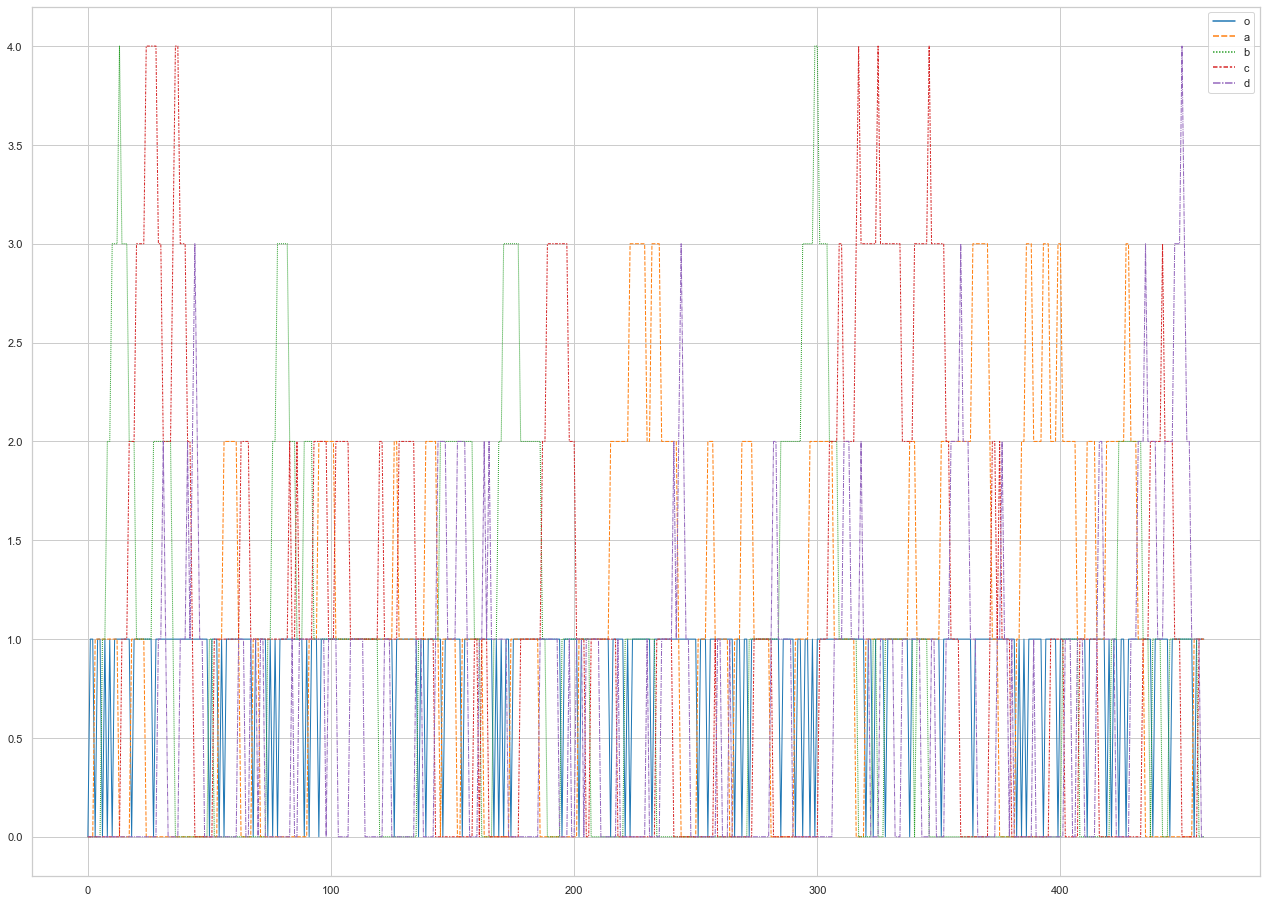

In [13]:
import seaborn as sns
import pandas as pd
sns.set(rc={'figure.figsize':(22,16)})
sns.set_theme(style="whitegrid")
values = n_part_time
time=np.arange(0,460)
data = pd.DataFrame(values, time, columns=["o", "a", "b", "c","d"])
sns.lineplot(data=data, palette="tab10", linewidth=1)
plt.savefig('ex31.svg')

In [14]:
n_simul = 1
n_part = np.array([0,0,0,0,0])
n_net=0

for k in range (0,n_simul):
    n_part = np.array([0,0,0,0,0])
    n_part_time= np.array([0,0,0,0,0])
    sum_tnext = 0
    n_net = 0
    print("simul",k)
    while (sum_tnext <= 60):
        if(n_part[0]==0):
            n_part[0] += 1
            n_net +=1
            sum_tnext += -np.log(np.random.rand())/(w_star)
            n_part_time = np.row_stack((n_part_time,n_part))
            
        else:
            prob_nodes = [n_part[0]/n_net, n_part[1]/n_net, n_part[2]/n_net,n_part[3]/n_net,n_part[4]/n_net]
            chosen_node = np.random.choice (n_nodes, p=prob_nodes)
            pos = np.random.choice(n_states, p = Q[chosen_node,:])
            n_part[chosen_node] -=1
            if (chosen_node==4):
                n_net -=1
            else:
                n_part[pos] +=1
            
            sum_tnext += -np.log(np.random.rand())/(w_star)
            n_part_time = np.row_stack((n_part_time,n_part))
        
            if (sum_tnext.is_integer()):
                n_part[0]+=1
                n_net +=1
            
       
    

simul 0
0
0
1
0
0
1
1
4
1
3
1
2
0
3
1
0
3
4
3
2
4
2
4
3
0
4
0
0
1
4
0
0
1
0
1
2
2
0
2
3
2
4
0
3
0
4
0
0
0
1
1
1
1
0
0
1
1
1
0
1
1
0
1
1
0
1
1
2
2
0
2
4
0
1
0
1
0
4
2
2
0
3
2
2
4
3
1
0
3
2
3
0


In [15]:
len(n_part_time)

112

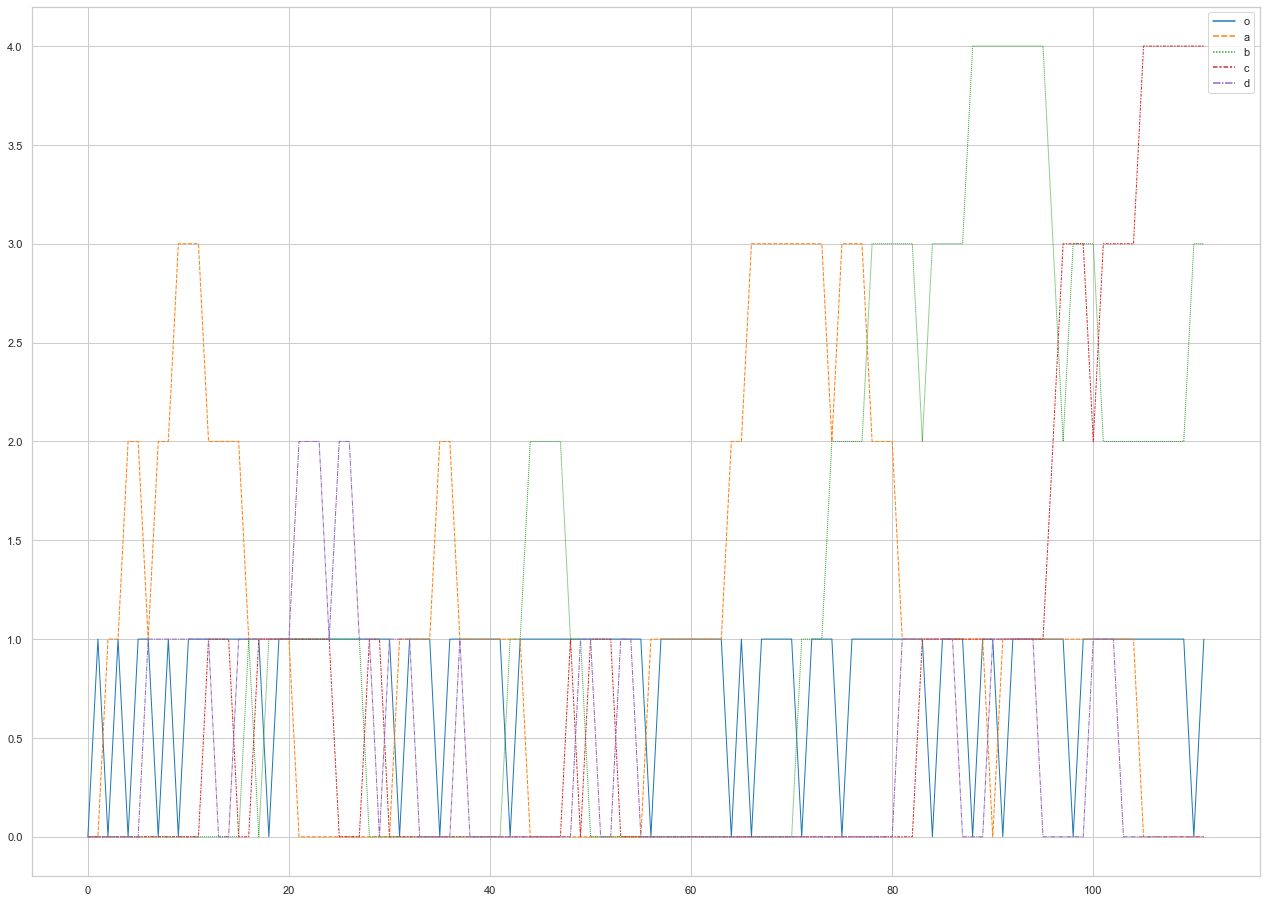

In [16]:
import seaborn as sns
import pandas as pd
sns.set(rc={'figure.figsize':(22,16)})
sns.set_theme(style="whitegrid")
values = n_part_time
time=np.arange(0,112)
data = pd.DataFrame(values, time, columns=["o", "a", "b", "c","d"])
sns.lineplot(data=data, palette="tab10", linewidth=1)
plt.savefig('ex32.svg')